### Figure S7

This code creates Figure S7 in the supplement.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio
import itertools as it

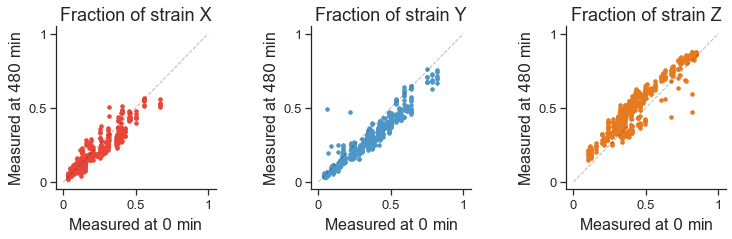

In [3]:
# Load the data from matlab .mat file
measured_fracs_0 = sio.loadmat('measured_fracs_time0.mat')
measured_fracs_480 = sio.loadmat('measured_fracs_time480.mat')

# Get the measured fractions at time 0 and time 480 minutes

sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
Fig_r = plt.figure(figsize=(12,3))

red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)

strains = ['X', 'Y', 'Z']
colors = [red_colors[5], blue_colors[5], orange_colors[5]]
for strain in range(3):
    plt.subplot(1,3,strain+1)
    for exper in range(3):
        for day in range(3):
            for cond in range(9):
                initial = measured_fracs_0['measured_fracs_time0'][strain, cond, day, exper]
                cond1 = (exper==0 & day==2 & cond==8)
                cond2 = (exper==1 & day==1 & cond==5)
                if cond1:
                    final = measured_fracs_480['measured_fracs_time480'][strain, cond, it.chain(range(3), range(4,6)), day, exper]
                    plt.plot(initial*np.ones(5), final, linestyle='none', marker='.', markersize=7, color=colors[strain])
                elif cond2:
                    final = measured_fracs_480['measured_fracs_time480'][strain, cond, it.chain(range(4), range(5,6)), day, exper]
                    plt.plot(initial*np.ones(5), final, linestyle='none', marker='.', markersize=7, color=colors[strain])
                else:
                    final = measured_fracs_480['measured_fracs_time480'][strain, cond, :, day, exper]
                    plt.plot(initial*np.ones(6), final, linestyle='none', marker='.', markersize=7, color=colors[strain])                                
    plt.title('Fraction of strain {}'.format(strains[strain]), fontsize=18)
    plt.xlabel('Measured at $ 0$ min', fontsize=16)
    plt.ylabel('Measured at $ 480$ min', fontsize=16)
    plt.xticks((0,0.5,1),(0,0.5,1))
    plt.yticks((0,0.5,1),(0,0.5,1)) 
    plt.plot([0, 1], [0, 1], linestyle='--', color='k', lw=1, alpha=0.3)
    sns.despine()
        
            
       
#Export Figure
Fig_r.subplots_adjust(wspace=0.6)
Fig_r.savefig("FigS7_measured_fracs_0_480.pdf", bbox_inches='tight', transparent=True)